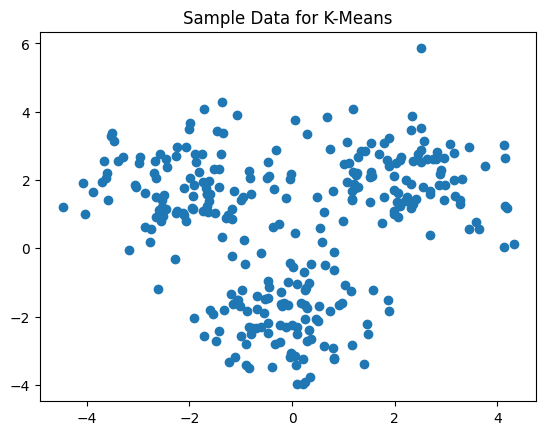

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data1 = np.random.randn(100, 2) + np.array([0, -2])
data2 = np.random.randn(100, 2) + np.array([2, 2])
data3 = np.random.randn(100, 2) + np.array([-2, 2])

data = np.vstack([data1, data2, data3])
plt.scatter(data[:,0], data[:,1])
plt.title("Sample Data for K-Means")
plt.show()

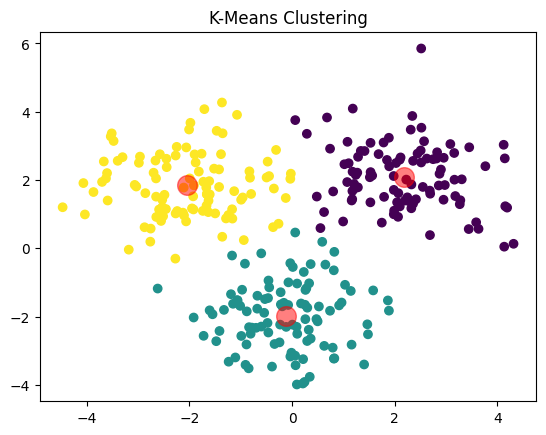

In [2]:
from sklearn.cluster import KMeans

# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Plotting the clusters
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title("K-Means Clustering")
plt.show()

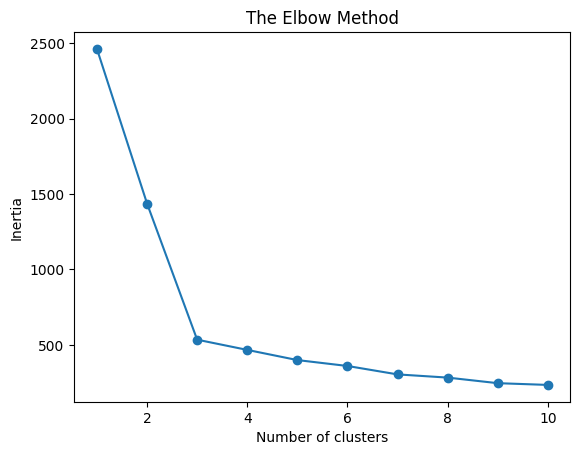

In [3]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [4]:
!pip3 install scikit-image

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

## K-Means Vector Quantization

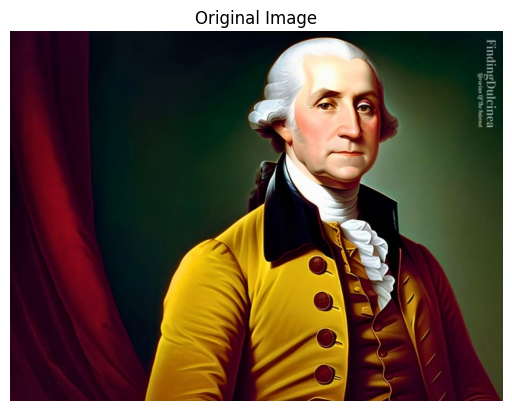

In [6]:
image_url = 'gw.jpg'  # Replace with your image URL
image = io.imread(image_url)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [7]:
image_flat = image.reshape((-1, 3)) / 255.0  # Normalize the RGB codes by 255

In [8]:
# Number of colors for the output image
num_colors = 10  

kmeans = KMeans(n_clusters=num_colors, random_state=42)
kmeans.fit(image_flat)

quantized_colors = kmeans.cluster_centers_
quantized_labels = kmeans.labels_

In [9]:
quantized_image = quantized_colors[quantized_labels]
quantized_image = np.reshape(quantized_image, (image.shape))

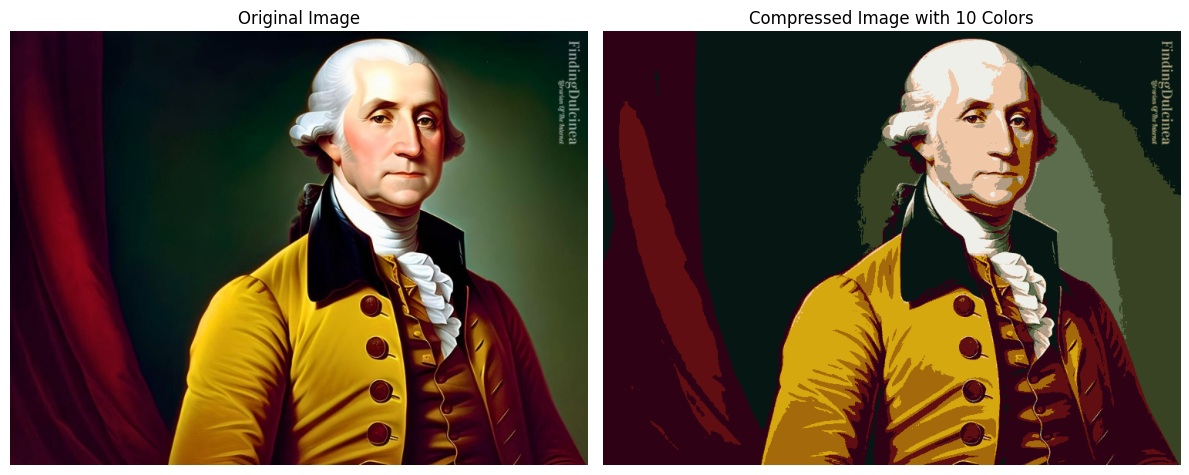

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(quantized_image)
plt.title(f'Compressed Image with {num_colors} Colors')
plt.axis('off')

plt.tight_layout()
plt.show()

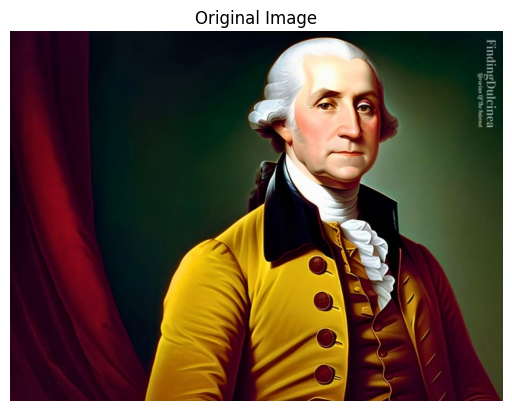

In [11]:
from skimage.color import rgb2lab
from skimage.color import lab2rgb
image_url = 'gw.jpg'  
image = io.imread(image_url)
image_lab = rgb2lab(image)  # Convert to LAB color space
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [12]:
# Get the dimensions of the image
rows, cols, _ = image.shape

# Prepare data for clustering
X = np.reshape(image_lab, (-1, 3))  # Flatten the color dimensions
Y = np.indices((rows, cols)).transpose(1, 2, 0).reshape(-1, 2)  # Spatial dimensions
Y = Y / np.array([rows, cols])  # Normalize spatial dimensions

# Combine color and space information
XY = np.concatenate((X, Y*10), axis=1)  # Weighting spatial dimensions

In [13]:
num_superpixels = 5  # Adjust based on desired granularity
kmeans = KMeans(n_clusters=num_superpixels, random_state=42)
kmeans.fit(XY)

# Get labels for each point
labels = kmeans.labels_

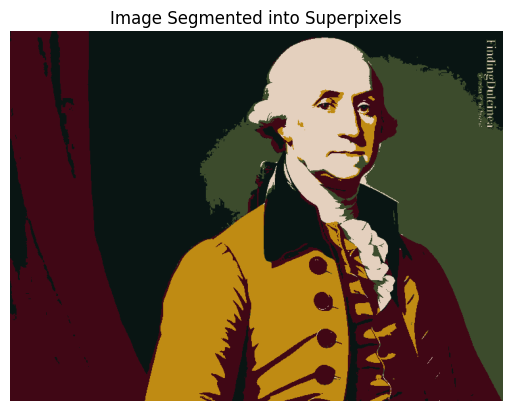

In [14]:
segmented_img = np.zeros((rows, cols, 3))
for i in range(num_superpixels):
    mask = labels.reshape(rows, cols) == i
    segmented_img[mask] = np.mean(image_lab[mask], axis=0)

# Correct conversion from LAB to RGB
segmented_img_rgb = lab2rgb(segmented_img)

plt.imshow(segmented_img_rgb)
plt.title("Image Segmented into Superpixels")
plt.axis('off')
plt.show()

## PCA

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [16]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [17]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

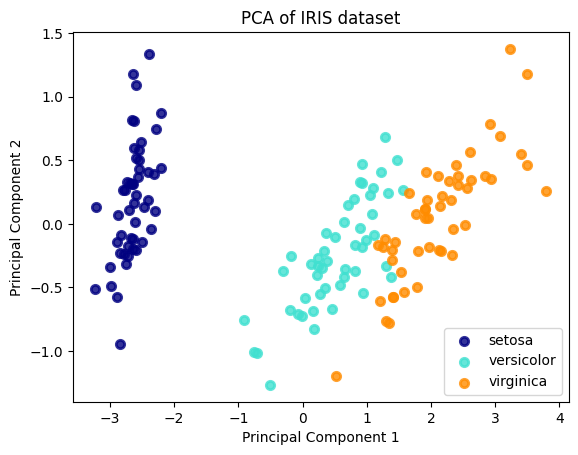

In [18]:
# Colors and labels
colors = ['navy', 'turquoise', 'darkorange']
target_names = iris.target_names

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [19]:
print(f"Explained variance ratio (first two components): {pca.explained_variance_ratio_}")

Explained variance ratio (first two components): [0.92461872 0.05306648]


In [20]:
from sklearn.datasets import fetch_openml

In [21]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target.astype(np.int_)

In [22]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

C:\Users\dwtro\AppData\Local\Temp\ipykernel_4860\4072118045.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.get_cmap('tab10', 10), alpha=0.5)


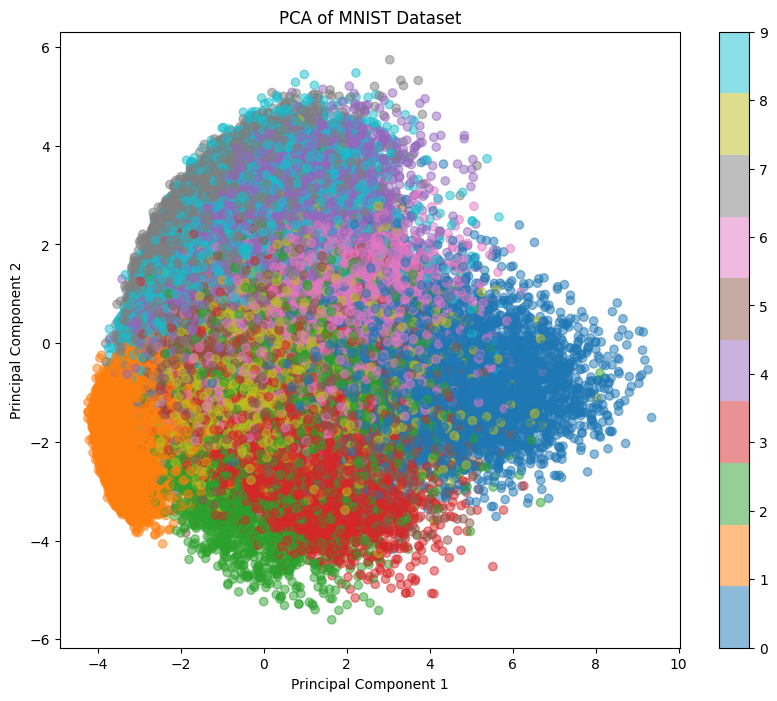

In [23]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.get_cmap('tab10', 10), alpha=0.5)
plt.colorbar(scatter, ticks=range(10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MNIST Dataset')
plt.show()

In [24]:
print(f"Explained variance ratio (first two components): {pca.explained_variance_ratio_}")

Explained variance ratio (first two components): [0.09746116 0.07155445]


## Solving the Cocktail Party Problem with Independent Component Analysis (ICA)

In [25]:
import numpy as np
import wave
import warnings
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy.io import wavfile

%matplotlib inline

warnings.filterwarnings('ignore')

In [26]:
# open and read wav files
mix_wave_1 = wave.open('ICA mix 1.wav', 'r')
mix_wave_2 = wave.open('ICA mix 2.wav', 'r')
mix_wave_3 = wave.open('ICA mix 3.wav', 'r')

In [27]:
# get parameters of wav file
mix_wave_1.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [28]:
# get length of wav file in seconds
len_of_file = 264515/44100 # nframes / framerate
print(f"length of file in seconds : {len_of_file}")

length of file in seconds : 5.998072562358277


In [29]:
# extract number of frames
def extract_frames(file):
  signal_raw = file.readframes(-1)
  signal = np.fromstring(signal_raw, 'int16')
  return signal

In [30]:
signal_1 = extract_frames(mix_wave_1)
signal_2 = extract_frames(mix_wave_2)
signal_3 = extract_frames(mix_wave_3)

In [31]:
# check length of signal_1
'''if somehow len of file is showing 0 then restart your python kernel
'''
len_of_signal_1 = len(signal_1)
print(f"length : {len_of_signal_1}") 

length : 264515


In [32]:
# get timing of signal_1
def get_timing(file, signal):
  fs = file.getframerate()
  timing = np.linspace(0, len(signal)/fs, num=len(signal))
  return timing
     

In [33]:
timing_1 = get_timing(mix_wave_1, signal_1)
timing_2 = get_timing(mix_wave_2, signal_2)
timing_3 = get_timing(mix_wave_3, signal_3)

In [34]:
# plot mix wave files
def plot_wave(timing, signal, title):
  plt.figure(figsize=(12 ,2))
  plt.title(title)
  plt.plot(timing, signal)
  plt.show()

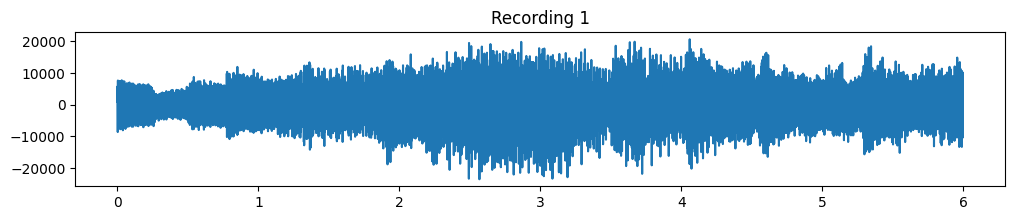

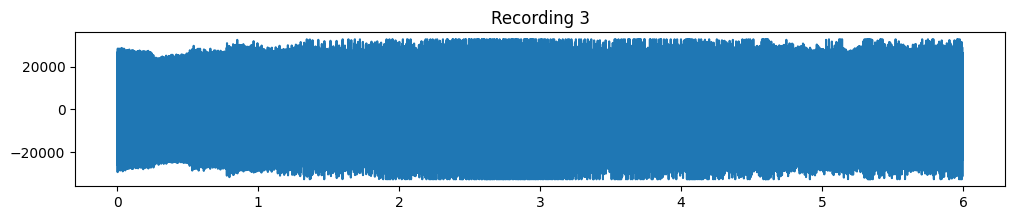

In [35]:
plot_wave(timing_1, signal_1, 'Recording 1')
plot_wave(timing_2, signal_2, "Recording 2")
plot_wave(timing_3, signal_3, 'Recording 3')

In [36]:
from IPython.display import Audio

# Play the first recovered signal
Audio('ICA mix 1.wav')

In [55]:
from IPython.display import Audio

# Play the first recovered signal
Audio('ICA mix 2.wav')

In [57]:
from IPython.display import Audio

# Play the first recovered signal
Audio('ICA mix 3.wav')

In [37]:
# zip all the signal into single list
data =  list(zip(signal_1, signal_2, signal_3))

In [38]:
# see what data looks like
data[:10]

[(879, 157, 879),
 (1268, 899, 2584),
 (1460, 1610, 4081),
 (1756, 2325, 5682),
 (1943, 3022, 7147),
 (2216, 3718, 8689),
 (2407, 4386, 10114),
 (2668, 5056, 11583),
 (2866, 5690, 12954),
 (3106, 6318, 14327)]

In [39]:
# initialise FastICA and fit and transform data
fastica = FastICA(n_components=3, max_iter=1000, tol=0.001)
ica_result = fastica.fit_transform(data)

In [40]:
# print the shape of result
ica_result.shape

(264515, 3)

In [41]:
# split signals
result_signal_1 = ica_result[:, 0]
result_signal_2 = ica_result[:, 1]
result_signal_3 = ica_result[:, 2]

In [42]:
# function to plot individual components
def plot_result_signal(result_signal, title):
  plt.figure(figsize=(12, 2))
  plt.title(title)
  plt.plot(result_signal)
  plt.ylim(-0.010, 0.010)
  plt.show()

In [52]:
# convert signal to int16
def convert_to_int16(result_signal, fs, filename):
  result_signal_int = np.int16(result_signal * 32767)
  signal_clipped = np.clip(result_signal_int, -1.0, 1.0)
  wavfile.write(filename, fs, result_signal_int)

In [53]:
# get framerate
fs_1 = mix_wave_1.getframerate()
fs_2 = mix_wave_2.getframerate()
fs_3 = mix_wave_3.getframerate()

# convert back to wav
convert_to_int16(result_signal_1, fs_1, "result_wav_1.wav")
convert_to_int16(result_signal_2, fs_2, "result_wav_2.wav")
convert_to_int16(result_signal_3, fs_3, "result_wav_3.wav")

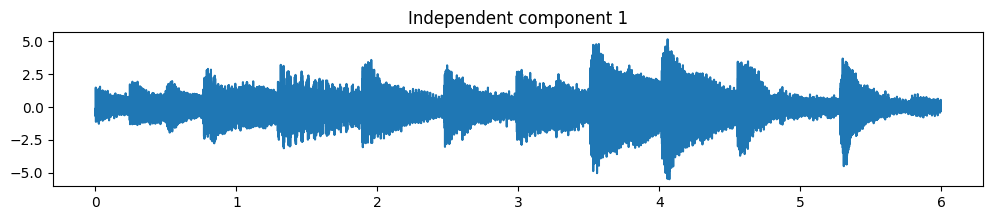

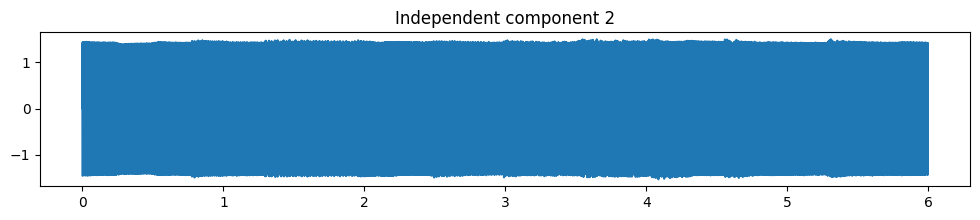

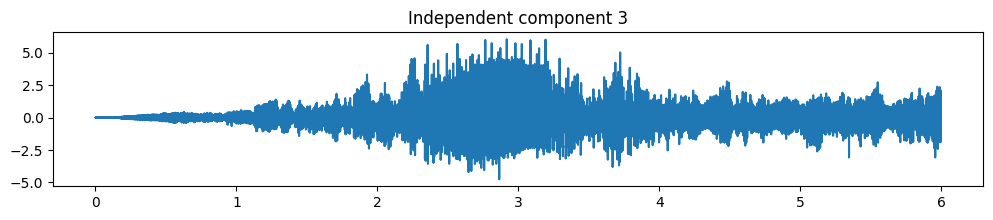

In [58]:
plot_wave(timing_1,result_signal_1, "Independent component 1")
plot_wave(timing_2,result_signal_2, "Independent component 2")
plot_wave(timing_3,result_signal_3, "Independent component 3")

In [54]:
from IPython.display import Audio

# Play the first recovered signal
Audio('result_wav_1.wav')

In [50]:
from IPython.display import Audio

# Play the second recovered signal
Audio('result_wav_2.wav')

In [51]:
from IPython.display import Audio

# Play the third recovered signal
Audio('result_wav_3.wav')